In [24]:
import pandas as pd
import seaborn as sns
sns.set_style("whitegrid")
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style("darkgrid")
POLmonthyearERC = pd.read_csv('queries_results/Poland/POL_USA/POL-USA monthyear eventRC count SUMaTone AVGaTonne.csv', header = 0,sep=' *, *', dtype={'EventRootCode':str})
POLmonthyearERC["Time"]=pd.to_datetime(POLmonthyearERC['MonthYear'], format='%Y%m').dt.strftime('%Y-%m')
eventcodes = pd.read_csv('cameo.csv', header = 0,dtype =str, sep=' *, *')
POLmonthyearERC = POLmonthyearERC.merge(eventcodes.set_index('CAMEOEVENTCODE'), left_on='EventRootCode',right_on='CAMEOEVENTCODE', how='left')

USAmonthyearERC = pd.read_csv('queries_results/USA/USA_POL/USA-POL monthyear eventRC count SUMaTone AVGaTonne.csv', header = 0,sep=' *, *', dtype={'EventRootCode':str})
USAmonthyearERC["Time"]=pd.to_datetime(USAmonthyearERC['MonthYear'], format='%Y%m').dt.strftime('%Y-%m')
USAmonthyearERC = USAmonthyearERC.merge(eventcodes.set_index('CAMEOEVENTCODE'), left_on='EventRootCode',right_on='CAMEOEVENTCODE', how='left')


/home/micha/GDELT/lib/python3.7/site-packages/ipykernel_launcher.py:8: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  
/home/micha/GDELT/lib/python3.7/site-packages/ipykernel_launcher.py:10: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  # Remove the CWD from sys.path while we load stuff.
/home/micha/GDELT/lib/python3.7/site-packages/ipykernel_launcher.py:13: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  del sys.p

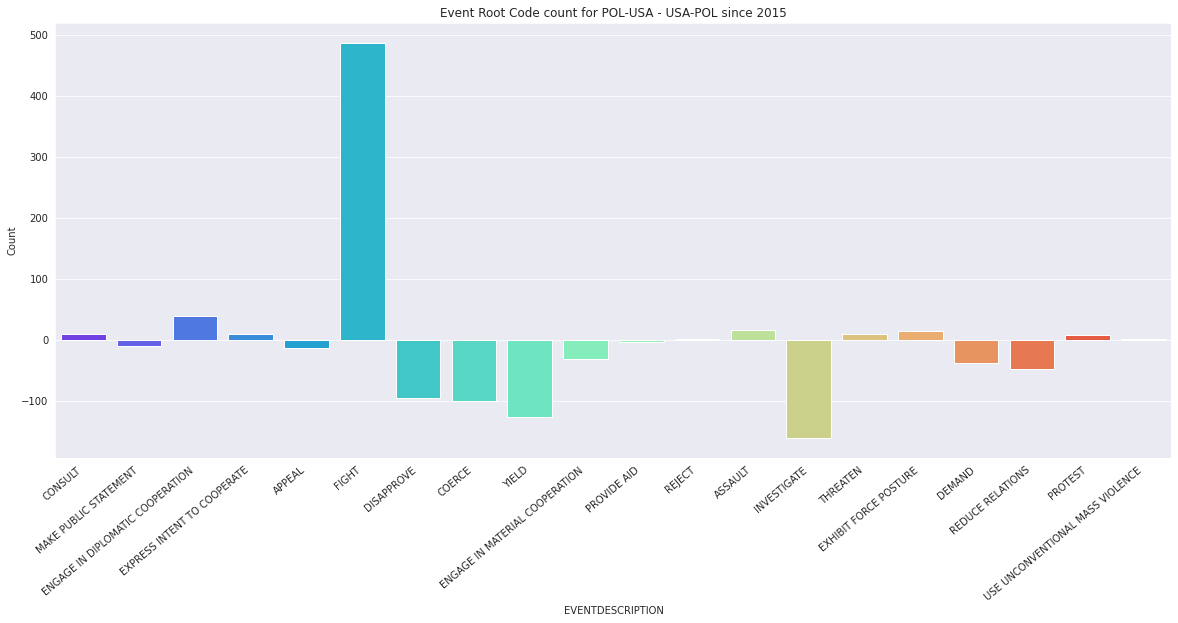

In [25]:
s = POLmonthyearERC.groupby("EVENTDESCRIPTION", as_index=False).sum().sort_values(by="Count", ascending=False).head(30)
t = USAmonthyearERC.groupby("EVENTDESCRIPTION", as_index=False).sum().sort_values(by="Count", ascending=False).head(30)
s['Count'] = POLmonthyearERC['Count']-USAmonthyearERC['Count']
g = sns.barplot(s.EVENTDESCRIPTION, s.Count, palette='rainbow')
g.set_title("Event Root Code count for POL-USA - USA-POL since 2015")
g.set(ylabel='Count')
g.set_xticklabels(g.get_xticklabels(), rotation=40, ha="right")
g.figure.set_size_inches(20,8)

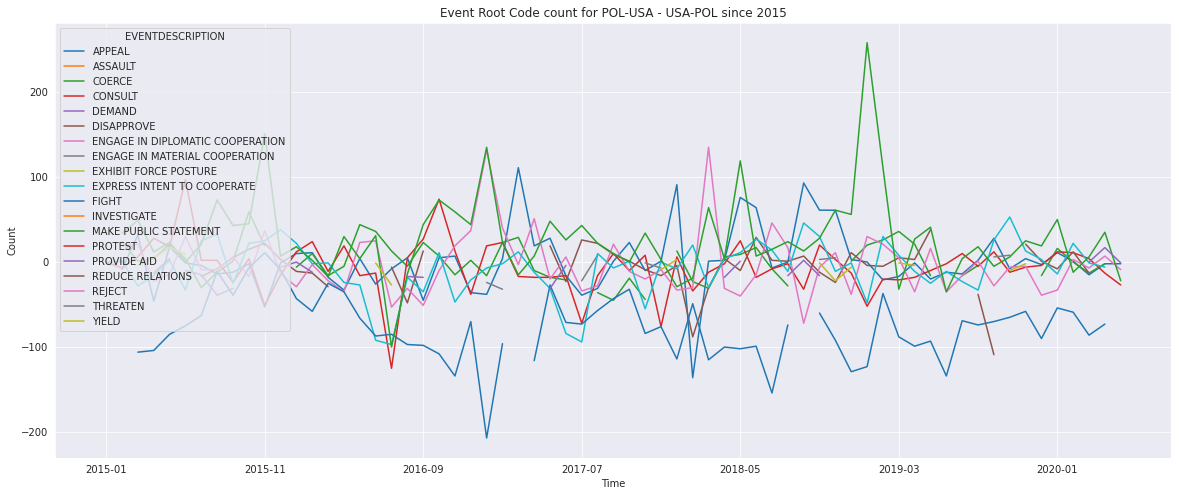

In [26]:
s = POLmonthyearERC.groupby(["EVENTDESCRIPTION", "Time"], as_index=False).sum().sort_values(by="Count", ascending=False).groupby("MonthYear").head(10)
s = s.groupby(["Time","EVENTDESCRIPTION"]).agg({'Count':'sum'})
t = USAmonthyearERC.groupby(["EVENTDESCRIPTION", "Time"], as_index=False).sum().sort_values(by="Count", ascending=False).groupby("MonthYear").head(10)
t = t.groupby(["Time","EVENTDESCRIPTION"]).agg({'Count':'sum'})
s['Count']= s['Count']-t['Count']
g = s.unstack().plot(y='Count')
g.set(ylabel='Count')
g.set_title("Event Root Code count for POL-USA - USA-POL since 2015")
g.figure.set_size_inches(20,8)

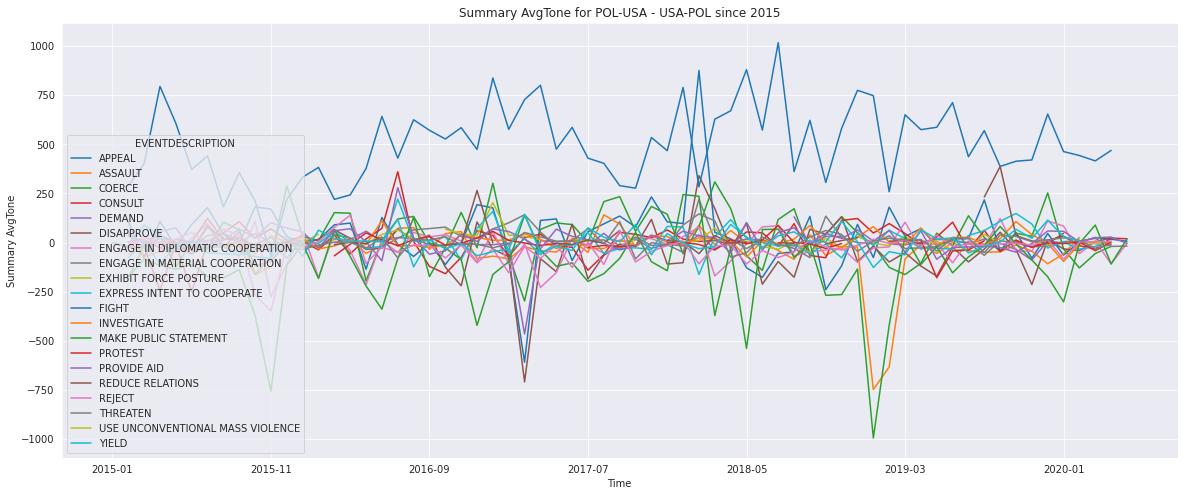

In [27]:
s = POLmonthyearERC.groupby(["Time","EVENTDESCRIPTION"]).agg({'SumAvgTone':'sum'})
t = USAmonthyearERC.groupby(["Time","EVENTDESCRIPTION"]).agg({'SumAvgTone':'sum'})
s['SumAvgTone']=s['SumAvgTone']-t['SumAvgTone']
g = s.unstack().plot(y='SumAvgTone')
g.set(ylabel='Summary AvgTone')
g.set_title("Summary AvgTone for POL-USA - USA-POL since 2015")
g.figure.set_size_inches(20,8)
